# Chapter 8
# Reflection and transmission

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5') # Needed for in-line movie

Figures i'd like to do:

* Figure showing wave pulse on string, going from thin to thick
* FIgure showing wave pulse on string, going from thick to thin

Need to build the model first

### Building a reflecting wave

* Model a wave pulse moving at speed $v$
* Introduce a boundary, define something to happen at that boundary
* Plot wave reflections / transmissions
* Plot wave sum

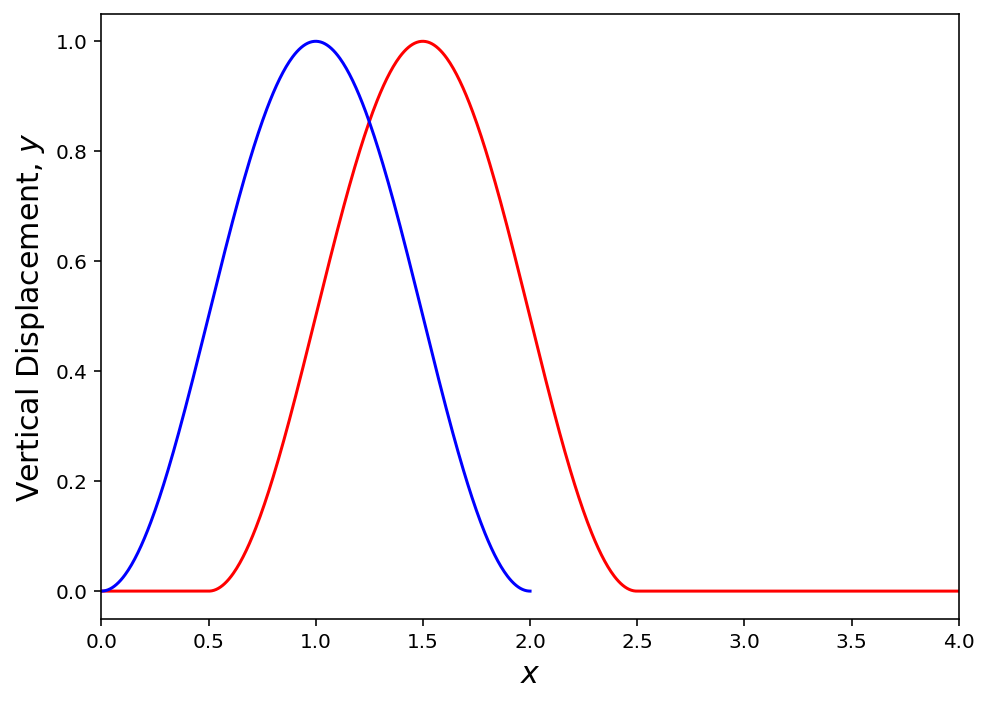

In [10]:
# Building a sinusoidal wave pulse
x_data_max = 4
pulse_width = 2
pulse_points = 200*pulse_width
data_points = int(x_data_max*pulse_points/pulse_width)

x_data_range = np.linspace(0,x_data_max,data_points)
pulse_pos = 1.5
x_pulse_range = np.linspace(0,int(pulse_width),int(pulse_points))
amp_1 = 1
x_pulse_func = amp_1*(np.sin(x_pulse_range*np.pi/pulse_width))**2
pulse_pos_index = (pulse_pos-0.5*pulse_width)*data_points/x_data_max
size_of_font = 15
boundary_pos = 2
boundary_index = boundary_pos*data_points/x_data_max

# Set paramaters of reflect/transmitted
amp_r = 0.6
amp_t = amp_1 - amp_r

# Approach to create pulse:
# 1. Create a zero array
zero_arr = np.zeros(data_points,dtype=float)
# 2. Write the pulse into array at time coordinate t
pulse_arr = np.insert(zero_arr,int(pulse_pos_index),x_pulse_func)
# 3. Truncate the array at full length
pulse_arr_trunc = pulse_arr[:data_points]

# Plot a graph
fig = plt.figure(figsize=(7,5))

ax = plt.axes()
#ax = fig.add_axes((0, 0, 1, 1))

ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)

ax.plot(x_data_range,pulse_arr_trunc,color='red')
ax.plot(x_pulse_range,x_pulse_func,color='blue')

ax.set_xlim(0,4)
#ax.set_ylim(0,)

plt.tight_layout()
#plt.savefig('ch6-wavemotion1.pdf',transparent=True)
#plt.savefig('ch6-wavemotion1.png',transparent=True)
#plt.savefig('ch6-wavemotion1.svg',transparent=True)
plt.show()

In [11]:
len(zero_arr)

800

In [12]:
# Example from https://www.cs.cornell.edu/courses/cs5220/2020fa/lec/wavedemo.html

import waves # Cornell specific python package... run pip install waves

# Set up an n-point uniform mesh
n = 1000
dx = 1.0/(n-1)
x0 = np.linspace(0.0,1.0,n)

# Speed of sound, space step, time step
c = 1.0
dt = 5e-4

# Sanity check the physical constants
C = c*dt/dx
print("CFL constant is {0} (should be < 1 for stability)".format(C))

# Set up initial conditions
u0 = np.exp(-(5*(x0-0.5))**2)
u1 = np.exp(-(5*(x0-0.5-c*dt))**2)
a = []

# Space for time steps
for i in range(5000):
    u2 = np.zeros(n, dtype=np.double)
    waves.time_step_func(1, u0, u1, u2, c, dx, dt)
    if i % 10 == 0:
        a.append(u2)
    u0 = u1
    u1 = u2

ModuleNotFoundError: No module named 'waves'

In [ ]:
!pip install waves

This might be a lost cause. Needs more thought.

In [ ]:
# String driven by an oscillating force - done in LaTeX

# Chapter 9: Sound waves and Doppler effect

https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c looks pretty cool


Show doppler effect using LaTeX again.

# Chapter 10: Superposition and Standing waves

### Argand diagram

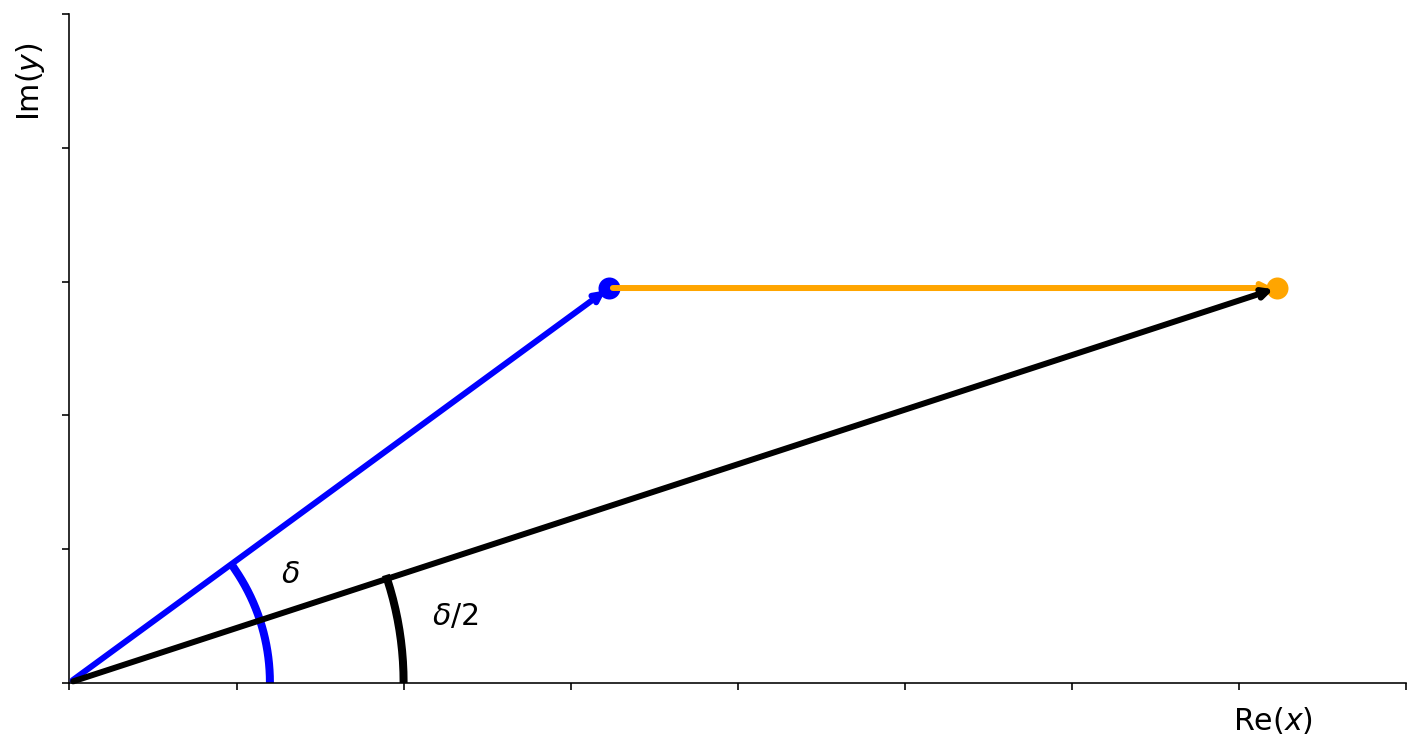

In [13]:
r_1 = 1
theta_1 = np.linspace(0,2*np.pi,200)
r_2 = 1
theta_2 = np.linspace(0,2*np.pi,200)

sample_point_1 = 20
sample_point_1b =sample_point_1/2

sample_point_2 = 0

x_1 = r_1*np.cos(theta_1)
y_1 = r_1*np.sin(theta_1)

x_2 = r_2*np.cos(theta_2)
y_2 = r_2*np.sin(theta_2)



x_tot = x_2[sample_point_2]+x_1[sample_point_1]
y_tot = y_2[sample_point_2]+y_1[sample_point_1]

def arc(radius,sweep):
    x = radius*np.cos(sweep)
    y = radius*np.sin(sweep)
    return x,y

plt.figure(figsize=(10,7))

ax = plt.axes()
ax.set_ylabel('Im($y$)',fontsize=15,y=0.9)

ax.set_xlabel('Re($x$)',fontsize=15,x=0.9)

ax.set_ylim(-0,1)
ax.set_xlim(-0,2)

ax.set_aspect('equal')
ax.annotate('', xy=(0,0), xytext=((x_1[sample_point_1]),y_1[sample_point_1]), 
            arrowprops=dict(arrowstyle='<-',color="blue",lw=3))
ax.plot((x_1[sample_point_1]),y_1[sample_point_1],'bo',markersize='10')

ax.annotate('', xy=((x_1[sample_point_1]),y_1[sample_point_1]), 
            xytext=(x_tot,y_tot), 
            arrowprops=dict(arrowstyle='<-',color="orange",lw=3))
ax.plot(x_tot,y_tot,'o',color="orange",markersize='10')


ax.plot((arc(0.3,theta_1[:20])[0]),(arc(0.3,theta_1[:20])[1]),'b',lw='4')
ax.text((arc(0.35,theta_1[14:15])[0]),(arc(0.35,theta_1[14:15])[1]),"$\delta$",fontsize=15)
ax.plot((arc(0.5,theta_1[:11])[0]),(arc(0.5,theta_1[:11])[1]),'k',lw='4')
ax.text((arc(0.55,theta_1[5:6])[0]),(arc(0.55,theta_1[5:6])[1]),"$\delta/2$",fontsize=15)



ax.annotate('', xy=(0,0), 
            xytext=(x_tot,y_tot), 
            arrowprops=dict(arrowstyle='<-',color="k",lw=3))

ax.set_xticklabels([])
ax.set_yticklabels([])


ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')


plt.tight_layout()
plt.savefig('ch10-complexnumbers1.pdf',transparent=True)
plt.savefig('ch10-complexnumbers1.png',transparent=True)
plt.savefig('ch10-complexnumbers1.svg',transparent=True)
plt.show()



In [14]:
arc(0.3,theta_1[:20])

(array([0.3       , 0.29985048, 0.29940206, 0.29865518, 0.29761061,
        0.29626937, 0.2946328 , 0.29270253, 0.29048049, 0.2879689 ,
        0.28517025, 0.28208733, 0.27872323, 0.27508129, 0.27116514,
        0.26697869, 0.26252611, 0.25781183, 0.25284057, 0.24761726]),
 array([0.        , 0.00947056, 0.01893169, 0.02837394, 0.03778791,
        0.04716421, 0.0564935 , 0.06576647, 0.07497389, 0.08410657,
        0.09315541, 0.10211139, 0.11096559, 0.11970917, 0.12833342,
        0.13682975, 0.14518968, 0.15340488, 0.16146717, 0.1693685 ]))

## Linear superposition

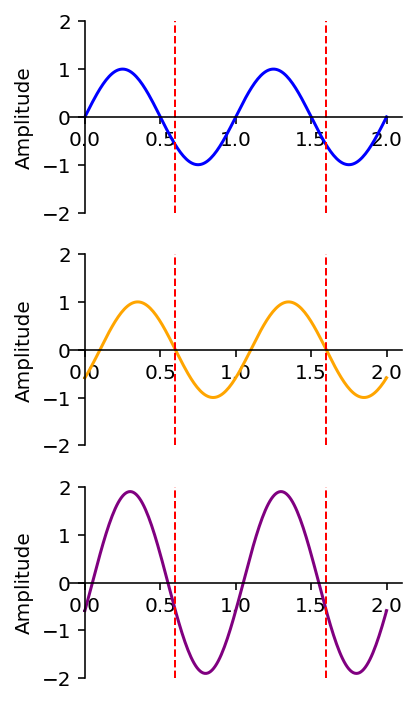

In [15]:
x_coords = np.linspace(0,2,200)
colors = ['blue','orange','purple']

def y_wave(a,k,delta):
    y_wave = a*np.sin(2*np.pi*(k*x_coords - delta))
    return y_wave

figure, axis = plt.subplots(3,1,figsize=(3,5))

y_1 = y_wave(1,1,0)
y_2 = y_wave(1,1,0.1)
y_3 = y_1 + y_2

ys = [y_1,
      y_2,y_3]

#axis.set_xlabel('Time')
#axis.set_ylabel('Amplitude')

for i in range(0,3):
    axis[i].plot(x_coords,ys[i],color=colors[i])
    axis[i].set_ylim(-2,2)
    axis[i].spines["top"].set_visible(False)
    axis[i].spines["right"].set_visible(False)
    axis[i].spines["left"].set_position(("data",0))
    axis[i].spines["bottom"].set_position(("data",0))
    axis[i].set_ylabel('Amplitude')
    axis[i].plot([0.6,0.6],[-2,2],color='r',lw=1,linestyle='--')
    axis[i].plot([1.6,1.6],[-2,2],color='r',lw=1,linestyle='--')





#axis[0].plot(x_coords,y_1,color='blue')
#axis[0].set_xlim(0,10)
#axis[0].set_xlabel('Time')
#axis[0].set_ylabel('Amplitude')
#axis[1].plot(x_coords,y_2,color='orange')
#axis[2].plot(x_coords,y_3,color='purple')



plt.tight_layout()
plt.savefig('slides-superposition2.pdf',transparent=True)


plt.show()

## Standing waves

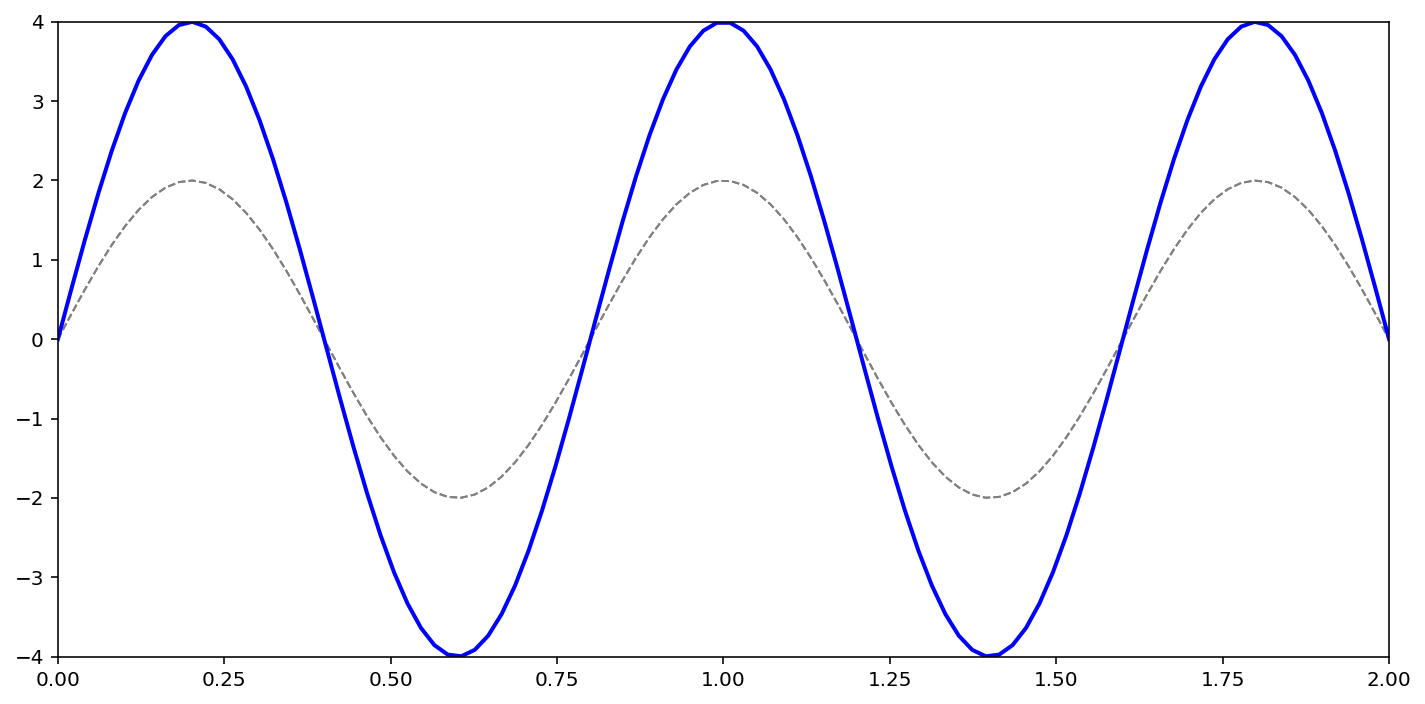

In [16]:
# Transverse waves

box_length_l = 2
T_period = 2
l = np.linspace(0,box_length_l,100)
t = np.linspace(0,T_period,160)
amp_0 = 2
harmonic_n = 5
T_period = harmonic_n

omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2

fig, ax = plt.subplots(figsize=(10,5))
ax.set(xlim=(0,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Plot the first line
wave_1plt = ax.plot(l,wave_1[0,:], color='gray',lw=1,linestyle='--')[0]
wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
wave_totplt = ax.plot(l,wave_tot[0,:], color='blue',lw=2,linestyle='-')[0]

# Label the nodes
#for i in node_loc[1:]:
#    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
#    ax.text(
#    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
#    
#for i in anode_loc[0:]:
#    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
#    ax.text(
#    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
    wave_1plt.set_ydata(wave_1[i,:])
    wave_2plt.set_ydata(wave_2[i,:])
    wave_totplt.set_ydata(wave_tot[i,:])


plt.tight_layout()


anim = animation.FuncAnimation(fig,animate,interval=10,frames=len(t)-1)

#anim.save('ch10-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=15)
#plt.savefig('ch10-standingwave-n'+str(harmonic_n)+'.pdf',transparent=True)

#anim.save('slides-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=60)


#plt.show()
anim

In [17]:
# Transverse waves

box_length_l = 2
T_period = 2
l = np.linspace(0,box_length_l,100)
t = np.linspace(0,T_period,160)
amp_0 = 2
harmonic_n = 3
harmonics = np.arange(1,11,1)
labels = str(np.arange(1,11,1))
amplitudes = np.random.randint(10,size=10)
#T_period = harmonic_n

#omega_0 = 10 #np.pi/T_period
#omega_n = harmonic_n*omega_0

k_n = harmonic_n*np.pi/box_length_l

#node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
#anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

#wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
#wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

def omega(n):
    omega = 2*n*np.pi/T_period
    return omega

def k(n):
    k = n*np.pi/box_length_l
    return k

def wave(amp,omega,k):
    wave = 2*amp*np.cos(omega*T2)*np.sin(k*L2)
    return wave

wave_0 = np.zeros(100,dtype=float)

for i in harmonics:
    wave = wave(amplitudes[i],omega[i],k[i])
    ax.plot(l,wave,color='blue',lw=2,linestyle='-')
    wave_0 = wave_0+wave

#wave_tot = wave(amp_0,omega(harmonic_n),k(harmonic_n))#2*amp_0*np.cos(omega_n*T2)*np.sin((harmonic_n*np.pi/box_length_l)*L2)

fig, ax = plt.subplots(figsize=(10,5))
ax.set(xlim=(0,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Plot the first line
#wave_1plt = ax.plot(l,wave_1[0,:], color='gray',lw=1,linestyle='--')[0]
#wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
wave_totplt = ax.plot(l,wave_0[0,:], color='blue',lw=2,linestyle='-')[0]

# Label the nodes
#for i in node_loc[1:]:
#    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
#    ax.text(
#    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
#    
#for i in anode_loc[0:]:
#    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
#    ax.text(
#    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
#    wave_1plt.set_ydata(wave_1[i,:])
#    wave_2plt.set_ydata(wave_2[i,:])
    wave_totplt.set_ydata(wave_tot[i,:])


plt.tight_layout()


anim = animation.FuncAnimation(fig,animate,interval=10,frames=len(t)-1)

#anim.save('ch10-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=15)
#plt.savefig('ch10-standingwave-n'+str(harmonic_n)+'.pdf',transparent=True)

#anim.save('slides-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=60)


#plt.show()
anim

TypeError: 'function' object is not subscriptable

In [ ]:
labels

In [1]:
# Transverse waves

box_length_l = 2
l = np.linspace(0,box_length_l,100)
amp_0 = 2
harmonic_n = 1
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)



omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2

fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlim=(0,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Plot the first line
wave_1plt = ax.plot(l,wave_1[0,:], color='gray',lw=1,linestyle='--')[0]
wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
wave_totplt = ax.plot(l,wave_tot[0,:], color='blue',lw=2,linestyle='-')[0]

# Label the nodes
for i in node_loc[1:]:
    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
    
for i in anode_loc[0:]:
    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
    wave_1plt.set_ydata(wave_1[i,:])
    wave_2plt.set_ydata(wave_2[i,:])
    wave_totplt.set_ydata(wave_tot[i,:])


plt.tight_layout()


anim = animation.FuncAnimation(fig,animate,interval=100,frames=(len(t)-1))

anim.save('ch10-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=15)
plt.savefig('ch10-standingwave-n'+str(harmonic_n)+'.pdf',transparent=True)




plt.show()
anim

NameError: name 'np' is not defined

### 

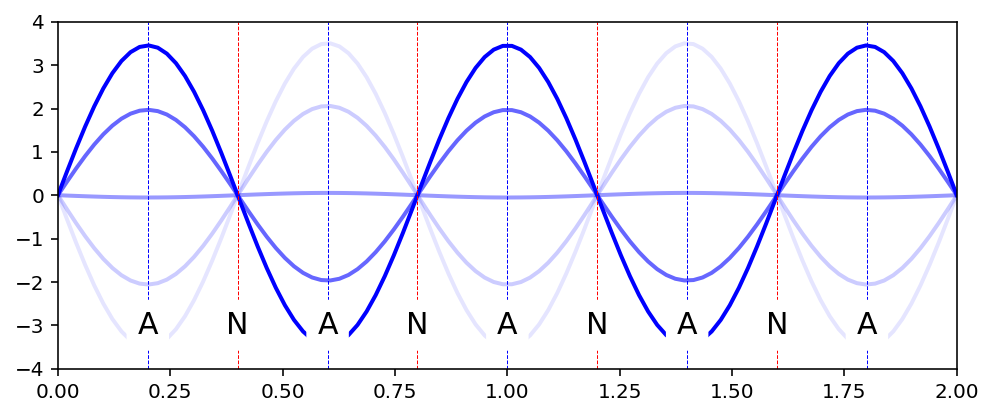

In [3]:
# Transverse waves

box_length_l = 2
l = np.linspace(0,box_length_l,100)
amp_0 = 2
harmonic_n = 5
T_period = 6/harmonic_n
t = np.linspace(0,2*T_period,120)
samples = np.linspace(0,100,10)

omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2
wave_rep = amp_0*(2*np.sin((harmonic_n*np.pi/box_length_l)*l))

fig, ax = plt.subplots(figsize=(7,3))
ax.set(xlim=(0,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Look at other parts of the wave...
ax.plot(l,wave_tot[2,:], color='blue',lw=2,linestyle='-',alpha = 1)#[1]
ax.plot(l,wave_tot[4,:], color='blue',lw=2,linestyle='-',alpha = 0.6)#[1]
ax.plot(l,wave_tot[6,:], color='blue',lw=2,linestyle='-',alpha = 0.4)#[1]
ax.plot(l,wave_tot[8,:], color='blue',lw=2,linestyle='-',alpha = 0.2)#[1]
ax.plot(l,wave_tot[10,:], color='blue',lw=2,linestyle='-',alpha = 0.1)#[1]






# Label the nodes
for i in node_loc[1:]:
    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
    
for i in anode_loc[0:]:
    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

#def animate(i):
#    wave_1plt.set_ydata(wave_1[i,:])
#    wave_2plt.set_ydata(wave_2[i,:])
#    wave_totplt.set_ydata(wave_tot[i,:])



plt.tight_layout()


#anim = animation.FuncAnimation(fig,animate,interval=100,frames=len(t)-1)

#anim.save('ch10-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=15)
#plt.savefig('ch10-standingwave_stages-n'+str(harmonic_n)+'.pdf',transparent=True)
#plt.savefig('ch10-standingwave_stages-n'+str(harmonic_n)+'.svg',transparent=True)





plt.show()
#anim

In [ ]:
node_loc

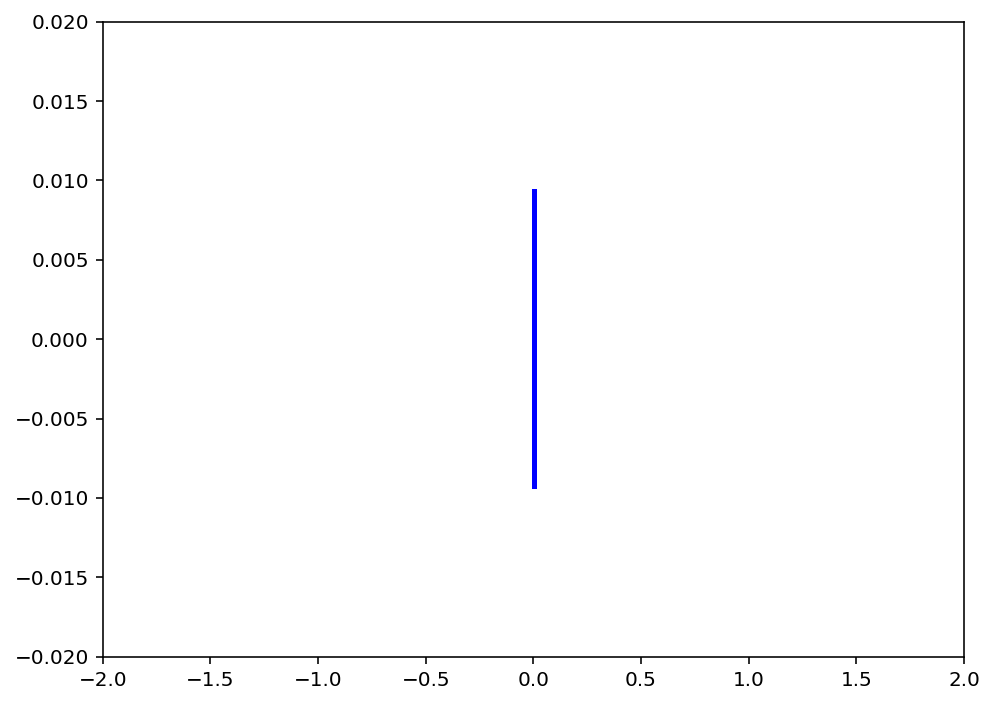

In [22]:
box_length_l = 2
T_period = 2
number_points = 20
l = np.linspace(0,box_length_l,number_points)
t = np.linspace(0,T_period,400)
amp_0 = 0.01
harmonic_n = 1
T_period = harmonic_n
y_zeros = np.zeros(number_points,dtype=float)

omega_0 = 1*np.pi/T_period
omega_n = harmonic_n*omega_0

#node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
#anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
#wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

#wave_tot = wave_1+wave_2

fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlim=(-box_length_l,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Plot the first line
wave_1plt = ax.plot(l[:]+wave_1[0,:],y_zeros,'|',markersize=150,color='blue')[0]
#wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
#wave_totplt = ax.plot(l,wave_tot[0,:], color='blue',lw=2,linestyle='-')[0]

# Label the nodes
#for i in node_loc[1:]:
#    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
#    ax.text(
#    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
    
#for i in anode_loc[0:]:
#    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
#    ax.text(
#    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
#    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
    wave_1plt.set_xdata(wave_1[i,:])
#    wave_2plt.set_ydata(wave_2[i,:])
#    wave_totplt.set_ydata(wave_tot[i,:])


plt.tight_layout()


anim = animation.FuncAnimation(fig,animate,interval=10,frames=len(t)-1)

anim.save('ch10-longstandingwave-n='+str(harmonic_n)+'.gif', writer='imagemagick', fps=30)



plt.show()

anim

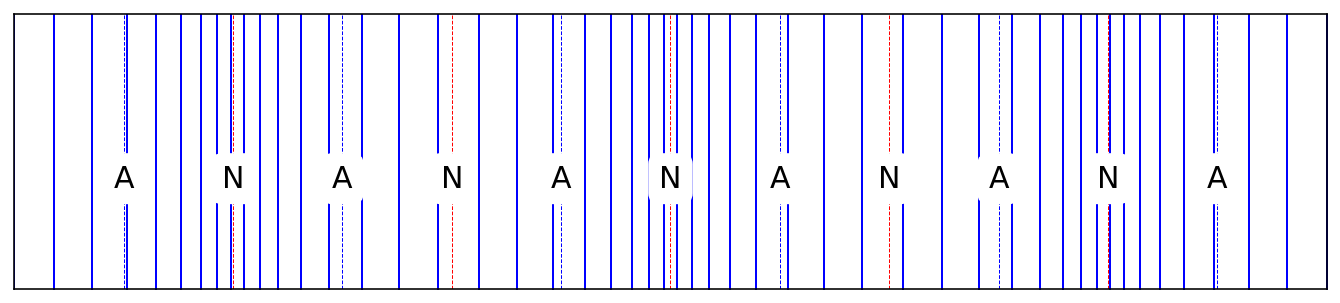

In [71]:
# Converting transvervse waves to longitudinal waves?

# Transverse waves

box_length_l = 2
number_samples = 50
l = np.linspace(0,box_length_l,number_samples)
harmonic_n = 6
amp_0 = (4/harmonic_n)*(box_length_l/number_samples)
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)
y_zeros = np.zeros(number_samples,dtype=float)




omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2

fig, ax = plt.subplots(figsize=(10,2.5))
ax.set(xlim=(0,box_length_l),ylim=(-0.2,0.2))

# Plot the first line
#wave_1plt = ax.plot(l,wave_1[0,:], color='gray',lw=1,linestyle='--')[0]
#wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
#wave_totplt = ax.plot(l,wave_tot[0,:], color='blue',lw=2,linestyle='-')[0]

#wave_1plt = ax.plot(l[:]+wave_1[0,:],y_zeros,'|',markersize=150,color='blue')[0]
#wave_2plt = ax.plot(l[:]+wave_2[0,:],y_zeros,'|',markersize=150,color='red')[0]
wave_totplt = ax.plot(l[:]+wave_tot[0,:],y_zeros, '|',markersize=150,color='blue')[0]

# Label the nodes
for i in node_loc[1:]:
    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
   
for i in anode_loc[0:]:
    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
#    wave_1plt.set_xdata(l[:]+wave_1[i,:])
#    wave_2plt.set_xdata(l[:]+wave_2[i,:])
    wave_totplt.set_xdata(l[:]+wave_tot[i,:])

#plt.axis('off')
plt.tight_layout()

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

#ax.spines['bottom'].set_position('zero')
#ax.spines['top'].set_color('none')
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')


#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

anim = animation.FuncAnimation(fig,animate,interval=100,frames=(len(t)-1))

anim.save('ch10-longitudinal-standingwave-n'+str(harmonic_n)+'closed.gif', writer='imagemagick', fps=15)
plt.savefig('ch10-longitudinal-standingwave-n'+str(harmonic_n)+'closed.pdf',transparent=True)




plt.show()
anim

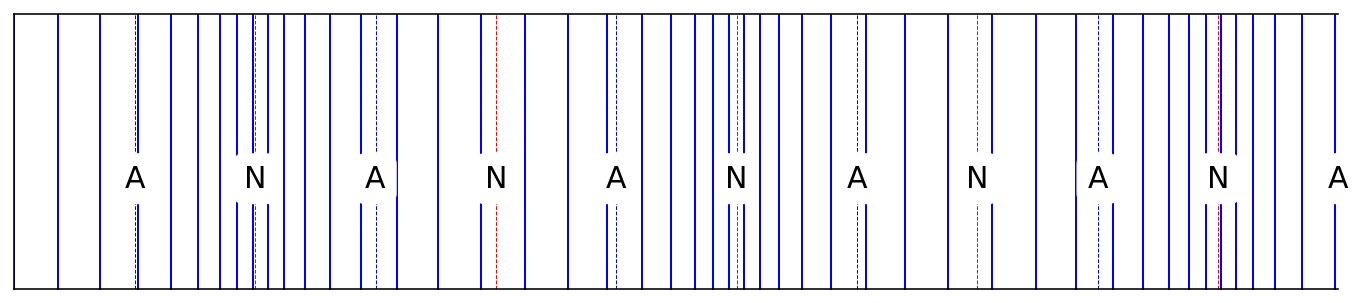

In [74]:
# Converting transvervse waves to longitudinal waves?

# Transverse waves

box_length_l = 2
number_samples = 50
l = np.linspace(0,box_length_l,number_samples)
harmonic_n = 6
amp_0 = (4/harmonic_n)*(box_length_l/number_samples)
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)
y_zeros = np.zeros(number_samples,dtype=float)




omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2

fig, ax = plt.subplots(figsize=(10,2.5))
ax.set(xlim=(0,((harmonic_n-0.5)*box_length_l/harmonic_n)),ylim=(-0.2,0.2))

# Plot the first line
#wave_1plt = ax.plot(l,wave_1[0,:], color='gray',lw=1,linestyle='--')[0]
#wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
#wave_totplt = ax.plot(l,wave_tot[0,:], color='blue',lw=2,linestyle='-')[0]

#wave_1plt = ax.plot(l[:]+wave_1[0,:],y_zeros,'|',markersize=150,color='blue')[0]
#wave_2plt = ax.plot(l[:]+wave_2[0,:],y_zeros,'|',markersize=150,color='red')[0]
wave_totplt = ax.plot(l[:]+wave_tot[0,:],y_zeros, '|',markersize=150,color='blue')[0]

# Label the nodes
for i in node_loc[1:]:
    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
   
for i in anode_loc[0:]:
    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
#    wave_1plt.set_xdata(l[:]+wave_1[i,:])
#    wave_2plt.set_xdata(l[:]+wave_2[i,:])
    wave_totplt.set_xdata(l[:]+wave_tot[i,:])

#plt.axis('off')
plt.tight_layout()

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

#ax.spines['bottom'].set_position('zero')
#ax.spines['top'].set_color('none')
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')


#ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

anim = animation.FuncAnimation(fig,animate,interval=100,frames=(len(t)-1))

anim.save('ch10-longitudinal-standingwave-n'+str(harmonic_n)+'open.gif', writer='imagemagick', fps=15)
plt.savefig('ch10-longitudinal-standingwave-n'+str(harmonic_n)+'open.pdf',transparent=True)

plt.show()
anim

In [ ]:
size_of_font = 15

#duration_of_anim = 2 #seconds
#frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
#sample = 2

tube_length_l = 4
number_of_points = 50
x = np.linspace(0, tube_length_l, number_of_points)
amp_1 = 0.03
harmonic_n = 1
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)
#x_limit = 2


node_loc = np.arange(0,tube_length_l,tube_length_l/harmonic_n)
anode_loc = np.arange((0+tube_length_l/(2*harmonic_n)),tube_length_l,tube_length_l/harmonic_n)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(( 0, tube_length_l))
ax.set_ylim((-0.2, 0.2))
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)

line, = ax.plot([], [], lw=0.5,linestyle='-')

#point, = ax.plot([],[],'|',markersize=75,color='gray')
#point3,= ax.plot([],[],'|',markersize=75,color='gray')
point_tot,= ax.plot([],[],'|',markersize=150,color='red')

#point2, = ax.plot([],[],'s',markersize=10,color='red')


for i in node_loc[:]:
    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    point.set_data([],[])
    point3.set_data([],[])
    point_tot.set_data([],[])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    # amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
    y1 = amp_1*np.sin(harmonic_n * np.pi * (x - 0.01 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
    y3 = amp_1*np.sin(harmonic_n * np.pi * (x + 0.01 * i))
#    y_point=np.sin(2*np.pi*(x[sample]-0.01*i)) 
#    line.set_data(x, y)
#    point.set_data(x+y1,0)
#    point3.set_data(x+y3,0)
    point_tot.set_data(x+y1+y3,0)
#    point2.set_data((x[20]+y[20],0))
    return (point, point3,point_tot,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

#anim.save('animation_test.gif', writer='imagemagick', fps=60)
#plt.savefig('animation.pdf',transparent=True)

anim

# Trying longitudinal waves again
* Taking working code from transverse waves
* Try to change displacement to x axis rather than y

In [ ]:
# Set up the parameters:

box_length_l = 2
l = np.linspace(0,box_length_l,100)
amp_0 = 0.01
harmonic_n = 2
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)

omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

# Define node locations 
# (these will need checked for POSITION node, rather than pressure node)

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

# Lock together position and time:
L2,T2 = np.meshgrid(l,t)

# Define motion of counterpropagating waves
wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)
# Add waves together for result
wave_tot = wave_1+wave_2


# For the problems class

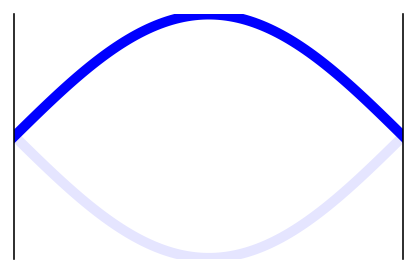

In [26]:
# Transverse waves

box_length_l = 2
l = np.linspace(0,box_length_l,100)
amp_0 = 2
harmonic_n = 1
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)
samples = np.linspace(0,100,10)

omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2
wave_rep = amp_0*(2*np.sin((harmonic_n*np.pi/box_length_l)*l))

fig, ax = plt.subplots(1,figsize=(3,2))
ax.set(xlim=(0,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Look at other parts of the wave...
ax.plot(l,wave_tot[2,:], color='blue',lw=5,linestyle='-',alpha = 1)#[1]
ax.plot(l,-wave_tot[2,:], color='blue',lw=5,linestyle='-',alpha = 0.1)#[1]


ax.set_xticklabels([])
ax.set_yticklabels([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)



plt.tight_layout()

#anim = animation.FuncAnimation(fig,animate,interval=100,frames=len(t)-1)

#anim.save('ch10-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=15)
plt.savefig('slides-standingwave_stages-n'+str(harmonic_n)+'.pdf',transparent=True)
#plt.savefig('ch10-standingwave_stages-n'+str(harmonic_n)+'.svg',transparent=True)





plt.show()
#anim